In [40]:
import sys
sys.path.insert(0, '../')
import data_file.CBCT_preprocess
from random import randint
import os
import random
import matplotlib.pyplot as plt
import numpy as np


In [32]:
folder = f"{randint(1, 4)}"
files = os.listdir(f"../data/{folder}/")
random_file = random.choice(files)
random_file_w_path = f"../data/{folder}/{random_file}"
random_file_w_path

'../data/4/IE1705794_P406.i180348.raw'

/Users/hugo/opt/miniconda3/envs/artefact/lib/python3.9/site-packages/skimage/transform/radon_transform.py:75: UserWarning: Radon transform: image must be zero outside the reconstruction circle
  warn('Radon transform: image must be zero outside the '


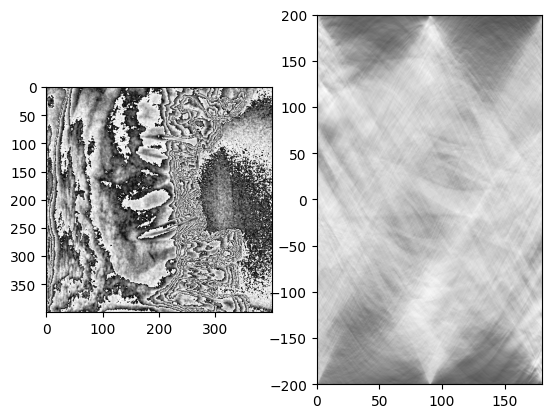

In [35]:
raw, sinogram,theta = data_file.CBCT_preprocess.Raw2Sinogram(random_file_w_path, 400, 400, 1)
fig, (ax1,ax2) = plt.subplots(1, 2)
ax1.imshow(raw,cmap=plt.cm.Greys_r,)
ax2.imshow(
            sinogram,
            cmap=plt.cm.Greys_r,
            extent=(0, 180, -sinogram.shape[0] / 2.0, sinogram.shape[0] / 2.0),
            aspect="auto",
        )
plt.show()



In [41]:
sinogram_unsqueeze = np.squeeze(sinogram, axis = -1) #(400x400x1) -> (400x400)


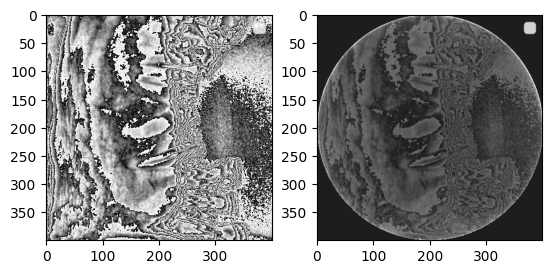

In [53]:
reconstructed_raw = data_file.CBCT_preprocess.ReconstructSinogram(sinogram_unsqueeze,theta)
fig, (ax1,ax2) = plt.subplots(1, 2)
ax1.imshow(raw,cmap = plt.cm.Greys_r )
ax1.legend("Original raw")
ax2.imshow(reconstructed_raw,cmap=plt.cm.Greys_r)
ax2.legend("Reconstructed_raw")
plt.show()

# On reconnait certain aspect neanmoins le format reste etonnant, exploitable ?

In [48]:
raw.shape
reconstructed_raw.shape

print(raw == reconstructed_raw)

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
